In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
original = {}
TotalPositive = 0
TotalNegative = 0
with open('data.class','r') as f:
    f = f.readlines()
    for line in f:
        line = line.split()
        if line[1]=='T':
            original[line[0]]=True 
            TotalPositive+=1
        else:
            original[line[0]]=False 
            TotalNegative+=1
roc1=[]
with open('roc1.txt','r') as f:
    f = f.readlines()
    for line in f:
        roc1.append(line.strip())
roc2=[]
with open('roc2.txt','r') as f:
    f = f.readlines()
    for line in f:
        roc2.append(line.strip())
roc3=[]
with open('roc3.txt','r') as f:
    f = f.readlines()
    for line in f:
        roc3.append(line.strip())
roc4=[]
with open('roc4.txt','r') as f:
    f = f.readlines()
    for line in f:
        roc4.append(line.strip())
rocperfect = []
for x in original.keys():
    if original[x]:
        rocperfect = [x]+rocperfect
    else:
        rocperfect.append(x)

In [3]:
def GetTPFP(k,dataset):
    TP=0
    FP=0
    TN=0
    FN=0
    for i in range (3000):
        #Identified True
        if i<k:
            TP+=original[dataset[i]]
        else:
            TN+=original[dataset[i]]
    #(TP,FP,TN,FN)
    #(F11,F01,F10,F00)
    #return (TP,TotalPositive-TP,TN,TotalNegative-TN)
    return (float (TP)/float(TotalPositive),float(k-TP)/float(TotalNegative))
        

In [4]:
roc1cm=[]
roc2cm=[]
roc3cm=[]
roc4cm=[]
rocperfectcm=[]
print 'processing roc1'
for i in range (3000):
    roc1cm.append(GetTPFP(i,roc1))
print 'processing roc2'
for i in range (3000):
    roc2cm.append(GetTPFP(i,roc2))
print 'processing roc3'
for i in range (3000):
    roc3cm.append(GetTPFP(i,roc3))
print 'processing roc4'
for i in range (3000):
    roc4cm.append(GetTPFP(i,roc4))
print 'processing rocperfect'
for i in range (3000):
    rocperfectcm.append(GetTPFP(i,rocperfect))
print 'Finished'

processing roc1
processing roc2
processing roc3
processing roc4
processing rocperfect
Finished


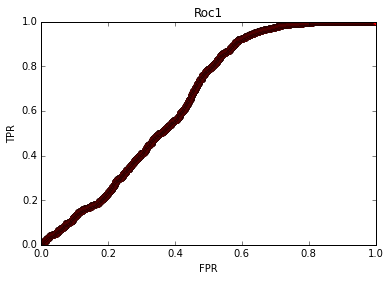

In [5]:
plt.figure('roc1.jpg')
plt.plot([x[1] for x in roc1cm],[x[0] for x in roc1cm], 'ro')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('Roc1')
#plt.show()
plt.savefig('roc1.jpg')

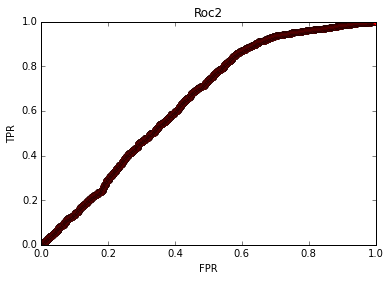

In [6]:
plt.figure('roc2.jpg')
plt.plot([x[1] for x in roc2cm],[x[0] for x in roc2cm], 'ro')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('Roc2')
#plt.show()
plt.savefig('roc2.jpg')

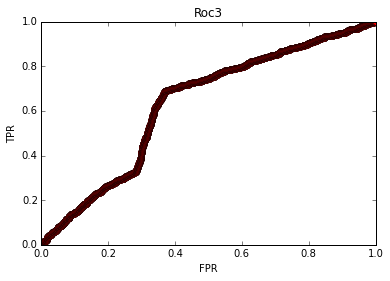

In [7]:
plt.figure('roc3.jpg')
plt.plot([x[1] for x in roc3cm],[x[0] for x in roc3cm], 'ro')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('Roc3')
#plt.show()
plt.savefig('roc3.jpg')

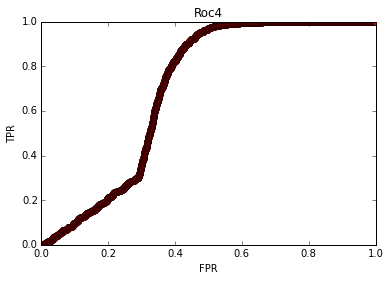

In [8]:
plt.figure('roc4.jpg')
plt.plot([x[1] for x in roc4cm],[x[0] for x in roc4cm], 'ro')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('Roc4')
#plt.show()
plt.savefig('roc4.jpg')

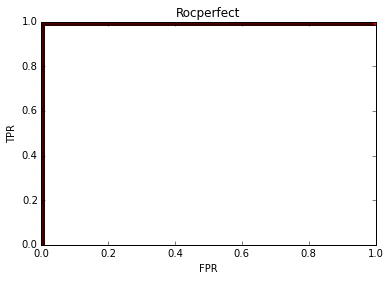

In [9]:
plt.figure('rocperfect.jpg')
plt.plot([x[1] for x in rocperfectcm],[x[0] for x in rocperfectcm], 'ro')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('Rocperfect')
#plt.show()
plt.savefig('rocperfect.jpg')

In [10]:
AUCROC1=0
AUCROC2=0
AUCROC3=0
AUCROC4=0
AUCROCPERFECT=0

for i in range(1,3000):
    AUCROC1+= (roc1cm[i][1]-roc1cm[i-1][1])*roc1cm[i][0]
    AUCROC2+= (roc2cm[i][1]-roc2cm[i-1][1])*roc2cm[i][0]
    AUCROC3+= (roc3cm[i][1]-roc3cm[i-1][1])*roc3cm[i][0]
    AUCROC4+= (roc4cm[i][1]-roc4cm[i-1][1])*roc4cm[i][0]
    AUCROCPERFECT+= (rocperfectcm[i][1]-rocperfectcm[i-1][1])*rocperfectcm[i][0]
    
print AUCROC1,AUCROC2,AUCROC3,AUCROC4,AUCROCPERFECT

0.650940277346 0.647270924831 0.629960231006 0.696844993141 0.99943977591


Third Question 
=============

In [12]:
def FindK(dataset):
    k=0
    lst=[]
    for i in range (3000):
        lst.append({'x':i,'y':dataset[i][0]-dataset[i][1]})

    lst.sort(key=lambda x: x['y'], reverse=True)
    return lst[0]['x']

In [16]:
roc1best = FindK(roc1cm)
roc2best = FindK(roc2cm)
roc3best = FindK(roc3cm)
roc4best = FindK(roc4cm)
rocperfectbest= FindK(rocperfectcm)
print roc1best,roc2best,roc3best,roc4best,rocperfectbest

2179 2089 1500 1996 1215


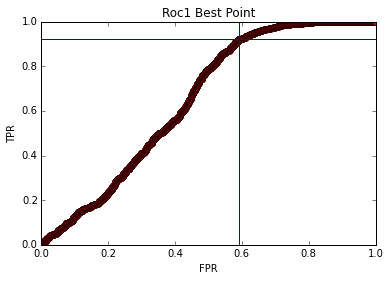

In [19]:
plt.figure('roc1_best.jpg')
plt.plot([x[1] for x in roc1cm],[x[0] for x in roc1cm], 'ro')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('Roc1 Best Point')
plt.axvline(x=roc1cm[roc1best][1])
plt.axhline(y=roc1cm[roc1best][0])
#plt.show()
plt.savefig('roc1_best.jpg')

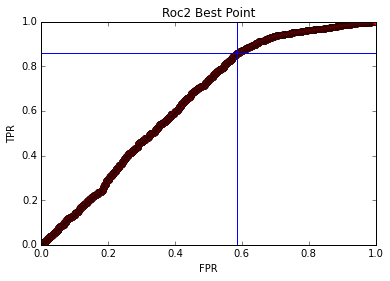

In [24]:
plt.figure('roc2_best.jpg')
plt.plot([x[1] for x in roc2cm],[x[0] for x in roc2cm], 'ro')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('Roc2 Best Point')
plt.axvline(x=roc2cm[roc2best][1])
plt.axhline(y=roc2cm[roc2best][0])
#plt.show()
plt.savefig('roc2_best.jpg')

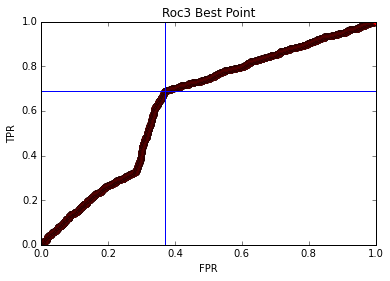

In [25]:
plt.figure('roc3_best.jpg')
plt.plot([x[1] for x in roc3cm],[x[0] for x in roc3cm], 'ro')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('Roc3 Best Point')
plt.axvline(x=roc3cm[roc3best][1])
plt.axhline(y=roc3cm[roc3best][0])
#plt.show()
plt.savefig('roc3_best.jpg')

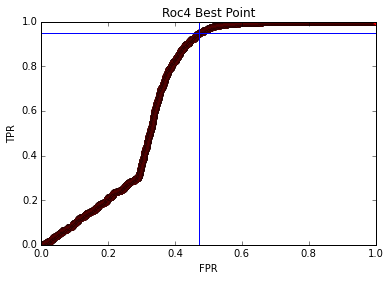

In [27]:
plt.figure('roc4_best.jpg')
plt.plot([x[1] for x in roc4cm],[x[0] for x in roc4cm], 'ro')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('Roc4 Best Point')
plt.axvline(x=roc4cm[roc4best][1])
plt.axhline(y=roc4cm[roc4best][0])
#plt.show()
plt.savefig('roc4_best.jpg')

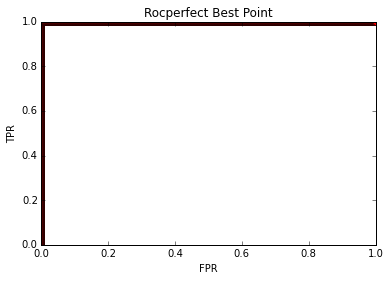

In [28]:
plt.figure('rocperfect_best.jpg')
plt.plot([x[1] for x in rocperfectcm],[x[0] for x in rocperfectcm], 'ro')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('Rocperfect Best Point')
plt.axvline(x=rocperfectcm[rocperfectbest][1])
plt.axhline(y=rocperfectcm[rocperfectbest][0])
#plt.show()
plt.savefig('rocperfect_best.jpg')

Sixth Question
==========================

In [67]:
def GetFPFN(k,dataset):
    FP=0
    FN=0
    for i in range (3000):
        #Predicted True
        if i<k:
            #but it's false
            FP+= not original[dataset[i]]
        #predicted false
        else:
            #but it's positive
            FN+= original[dataset[i]]
    #(TP,FP,TN,FN)
    #(F11,F01,F10,F00)
    #return (TP,TotalPositive-TP,TN,TotalNegative-TN)
    #return (float (TP)/float(TotalPositive),float(k-TP)/float(TotalNegative))
    return (FP,FN)

In [68]:
roc1cm=[]
roc2cm=[]
roc3cm=[]
roc4cm=[]
rocperfectcm=[]
print 'processing roc1'
for i in range (3000):
    roc1cm.append(GetFPFN(i,roc1))
print 'processing roc2'
for i in range (3000):
    roc2cm.append(GetFPFN(i,roc2))
print 'processing roc3'
for i in range (3000):
    roc3cm.append(GetFPFN(i,roc3))
print 'processing roc4'
for i in range (3000):
    roc4cm.append(GetFPFN(i,roc4))
print 'processing rocperfect'
for i in range (3000):
    rocperfectcm.append(GetFPFN(i,rocperfect))
print 'Finished'

processing roc1
processing roc2
processing roc3
processing roc4
processing rocperfect
Finished


In [76]:
def FindKminimum(dataset):
    k=0
    lst=[]
    for i in range (3000):
        lst.append({'x':i,'y':dataset[i][0]*15+20*dataset[i][1]})

    lst.sort(key=lambda x: x['y'], reverse=False)
    return lst[0]['x']

In [77]:
print roc1cm[1000]

(521, 736)


In [83]:
roc1best = FindKminimum(roc1cm)
roc2best = FindKminimum(roc2cm)
roc3best = FindKminimum(roc3cm)
roc4best = FindKminimum(roc4cm)
rocperfectbest= FindKminimum(rocperfectcm)
print 'Best Points roc1:{}, roc2:{}, roc3:{}, roc4:{}, rocperfect:{}'.format(roc1cm[roc1best],roc2cm[roc2best],roc3cm[roc3best],roc4cm[roc4best], rocperfectcm[rocperfectbest])

Best Points roc1:(1058, 94), roc2:(1045, 171), roc3:(661, 376), roc4:(842, 61), rocperfect:(0, 0)


In [84]:
def PrintTotalCost(row):
    return row[0]*15+row[1]*20

In [86]:
print 'Best Points roc1:{}, roc2:{}, roc3:{}, roc4:{}, rocperfect:{}'.format(PrintTotalCost(roc1cm[roc1best]),
                                                                             PrintTotalCost(roc2cm[roc2best]),
                                                                             PrintTotalCost(roc3cm[roc3best]),
                                                                             PrintTotalCost(roc4cm[roc4best]),
                                                                             PrintTotalCost(rocperfectcm[rocperfectbest]))

Best Points roc1:17750, roc2:19095, roc3:17435, roc4:13850, rocperfect:0
